# Machine Learning with logistic regression

In this project we will work with a fake advertising data set, indicating whether or not a particular internet user clicked on an advertisement. 

We will create a logistic regression model that will predict whether or not a user will click on an ad, based on his/her features. As this is a binary classification problem, a logistic regression model is well suited here.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

The data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [43]:
name = 'advertising.csv'
data = pd.read_csv(name)

In [44]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [46]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


## Exploratory Data Analysis
Checking out the distribution of users age

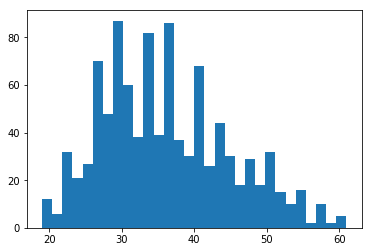

In [47]:
plt.hist(data['Age'], bins=30)
plt.show()

Checking out the relationship between age and daily time spent on site

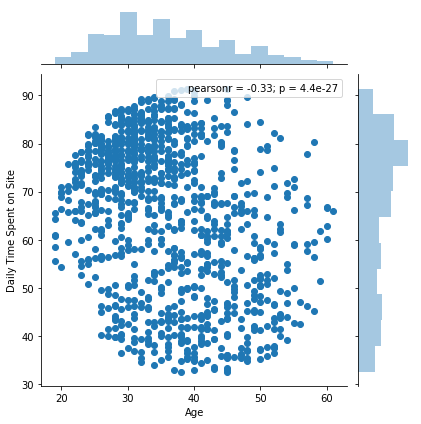

In [48]:
sns.jointplot('Age', 'Daily Time Spent on Site', data)

Relationship between daily time spent on site and daily internet usage

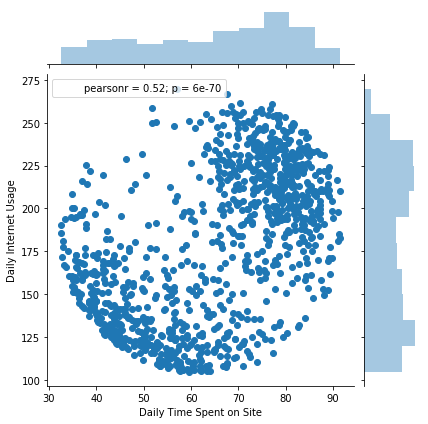

In [49]:
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage',data)

Finally, a pairplot to visualise everything else, colored on the basis of whether they clicked the ad or not.

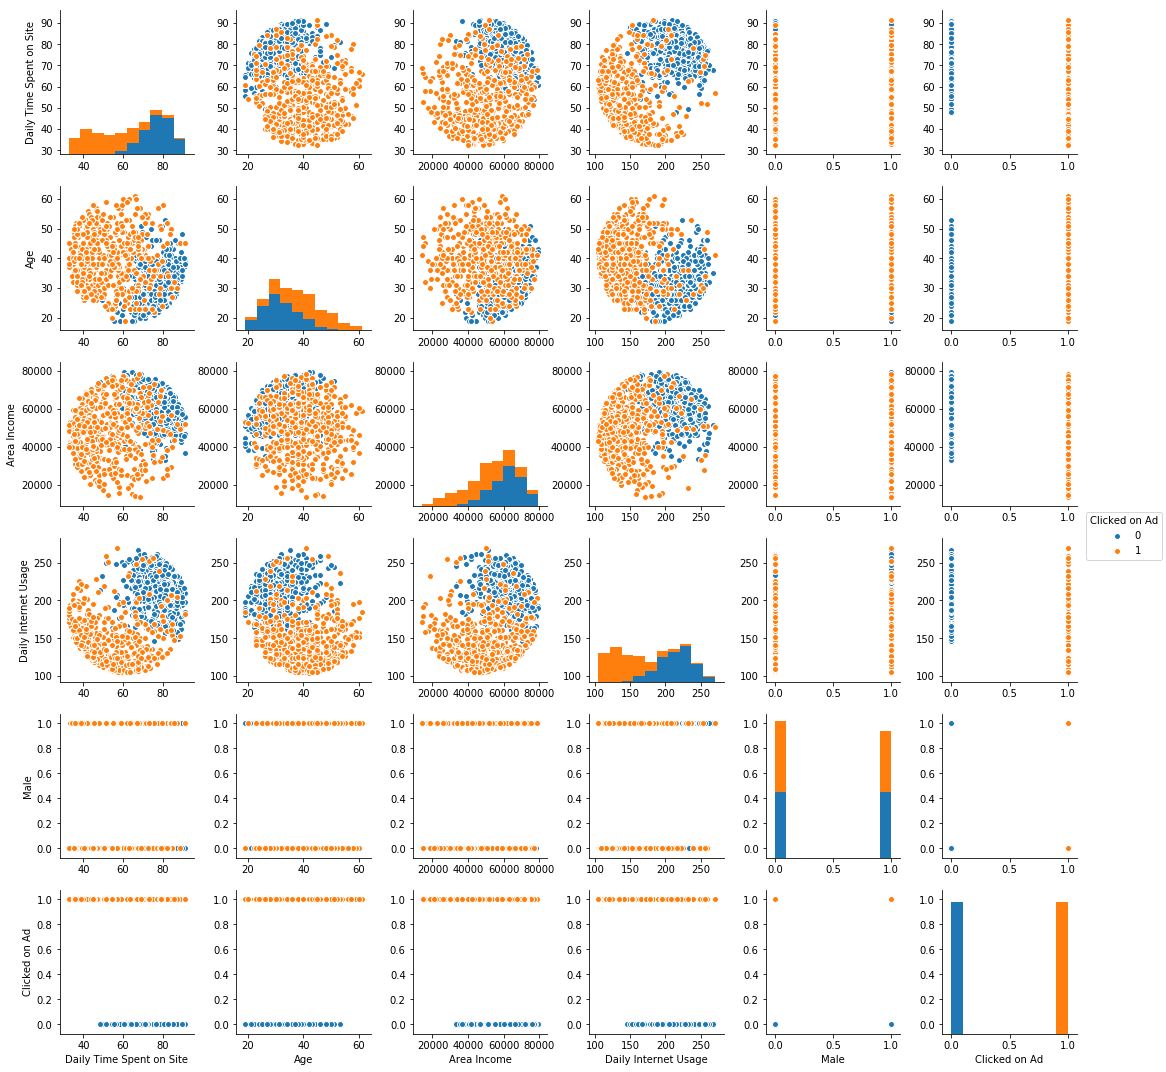

In [50]:
sns.pairplot(data,hue='Clicked on Ad')

# Model Building

We'll split the data into training set and testing set using train_test_split, but first, let's convert the 'Country' feature to an acceptable form for the model.

In [51]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

As we can't directly use the 'Country' feature (because it's a categorical string), we have to find another way to feed it into the model.

One way to go about this is to drop the feature, but we risk losing useful information. 

So, what we can do is, convert the categorical feature into dummy variables using pandas.

In [52]:
countries = pd.get_dummies(data['Country'],drop_first=True)

Concatenating dummy variables with the original dataset, and dropping other features.

In [53]:
data = pd.concat([data,countries],axis=1)

In [54]:
data.drop(['Country', 'Ad Topic Line', 'City', 'Timestamp'],axis=1,inplace=True)

## Spliting the dataset

In [55]:
X = data.drop('Clicked on Ad',axis=1)
y = data['Clicked on Ad']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

## Training the model

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logR = LogisticRegression()

In [60]:
logR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Prediction and Evaluation

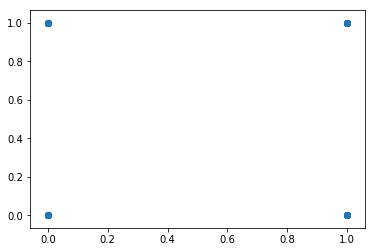

In [61]:
predictions = logR.predict(X_test)
plt.scatter(y_test, predictions)

Classification report for the model

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300

